In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from keras.optimizers import SGD
from keras import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# fix random seed for reproducibility
np.random.seed(7)
var_w=lambda shape: initializers.RandomUniform(-0.5,0.5)

In [58]:
# load pima indians dataset
dataset = pd.read_csv("/Users/malush/Desktop/projet AFD 2018/train_cap2018.csv", sep=",")
# split into input (X) and output (Y) variables
scaler = StandardScaler()
X=dataset.iloc[:,1:59].astype(float)
Y=dataset.iloc[:,59]


X, X_test, Y, Y_test = train_test_split(X, Y)
w = np.isnan(X)
X[w] = 0#X.mean() à changer
w2= np.isnan(X_test)
X_test[w2] = 0

#Normalisation 

scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X = scaler.transform(X)
X_test = scaler.transform(X_test)




In [59]:
Y.shape

(20482,)

In [60]:
#Pour encoder Y
encoder = LabelEncoder()
encoder.fit(Y)
#converti le Y de chaine de caractères à numérique
Y_numerique = encoder.transform(Y)

print(Y_numerique)
# convert integers to dummy variables (i.e. one hot encoded)
y_encode_binaire = np_utils.to_categorical(Y_numerique)#6

print(y_encode_binaire)

[1 0 1 ... 1 0 1]
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [61]:
print(y_encode_binaire)

[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]


In [62]:
X #exemple X


array([[-0.0490142 ,  0.22494019, -0.15309796, ..., -1.41973269,
        -0.7780132 ,  1.85708806],
       [-0.32998505, -0.4700053 , -0.31685252, ...,  0.55580086,
         0.07681255, -0.81828322],
       [ 0.79389835,  0.05719473, -0.10943008, ..., -0.43196591,
        -0.38054168, -0.21750676],
       ...,
       [ 0.23195665,  0.00926745,  0.05432448, ...,  1.34601429,
         1.88077931, -1.26062445],
       [-1.45386845, -1.21287807, -1.15200076, ...,  0.65457754,
        -0.73310116,  1.04636949],
       [ 1.0748692 ,  0.105122  ,  0.42004299, ..., -0.62951927,
        -0.46437748, -0.33988715]])

In [66]:

# create model
model = Sequential()
model.add(Dense(50, input_dim=58,kernel_initializer='normal', activation='relu'))#

model.add(Dense(500, activation='relu'))
model.add(Dense(6,kernel_initializer='normal', activation='softmax'))# a revoir la fct


In [69]:

# Compile model
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])#adamax

In [70]:
# Fit the model
model.fit(X, y_encode_binaire, epochs=100, batch_size=32)

Epoch 1/100
20482/20482 [==============================] - 1s 69us/step - loss: 0.2026 - acc: 0.9287
Epoch 2/100
20482/20482 [==============================] - 1s 58us/step - loss: 0.1979 - acc: 0.9303
Epoch 3/100
20482/20482 [==============================] - 1s 57us/step - loss: 0.1942 - acc: 0.9305
Epoch 4/100
20482/20482 [==============================] - 1s 57us/step - loss: 0.1904 - acc: 0.9326
Epoch 5/100
20482/20482 [==============================] - 1s 58us/step - loss: 0.1889 - acc: 0.9339
Epoch 6/100
20482/20482 [==============================] - 1s 57us/step - loss: 0.1891 - acc: 0.9346
Epoch 7/100
20482/20482 [==============================] - 1s 58us/step - loss: 0.1848 - acc: 0.9354
Epoch 8/100
20482/20482 [==============================] - 1s 59us/step - loss: 0.1849 - acc: 0.9339
Epoch 9/100
20482/20482 [==============================] - 1s 58us/step - loss: 0.1825 - acc: 0.9385
Epoch 10/100
20482/20482 [==============================] - 1s 57us/step - loss: 0.1817 - a

20482/20482 [==============================] - 1s 56us/step - loss: 0.1177 - acc: 0.9643
Epoch 82/100
20482/20482 [==============================] - 1s 55us/step - loss: 0.1170 - acc: 0.9636
Epoch 83/100
20482/20482 [==============================] - 1s 55us/step - loss: 0.1176 - acc: 0.9627
Epoch 84/100
20482/20482 [==============================] - 1s 55us/step - loss: 0.1163 - acc: 0.9645
Epoch 85/100
20482/20482 [==============================] - 1s 57us/step - loss: 0.1183 - acc: 0.9631
Epoch 86/100
20482/20482 [==============================] - 1s 57us/step - loss: 0.1149 - acc: 0.9638
Epoch 87/100
20482/20482 [==============================] - 1s 57us/step - loss: 0.1135 - acc: 0.9648
Epoch 88/100
20482/20482 [==============================] - 1s 55us/step - loss: 0.1129 - acc: 0.9649
Epoch 89/100
20482/20482 [==============================] - 1s 57us/step - loss: 0.1109 - acc: 0.9659
Epoch 90/100
20482/20482 [==============================] - 1s 56us/step - loss: 0.1124 - acc: 

In [72]:
scores = model.evaluate(X, y_encode_binaire)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print(scores)

20482/20482 [==============================] - 1s 31us/step

acc: 96.27%


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


(6828,)


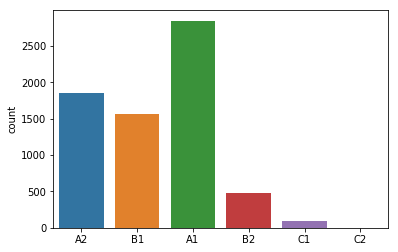

In [74]:
predictions = model.predict_classes(X_test)
classes = encoder.inverse_transform(predictions)


import seaborn as sns
import matplotlib.pyplot as plt

print(classes.shape)
sns.countplot(classes,label="Count")
plt.show()


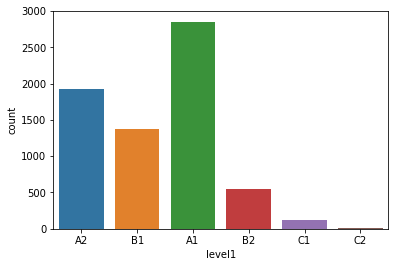

(6828,)

In [78]:
sns.countplot(Y_test,label="Count")
plt.show()
Y_test.shape